In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TESLA.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [4]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [5]:
print("Total null values in our dataframe is/are : {}".format(df.isnull().sum().sum()))

Total null values in our dataframe is/are : 0


In [6]:
df = df[['Adj Close']]
df

,Adj Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2416 non-null   float64
dtypes: float64(1)
memory usage: 37.8 KB


In [8]:
import pandas_ta
df.ta.ema(close='Adj Close', length=15, append=True)


C:\Users\kp779\anaconda3\lib\site-packages\pandas_ta\core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2020-01-28    525.752254
2020-01-29    532.656971
2020-01-30    546.176099
2020-01-31    559.225338
2020-02-03    586.822171
Name: EMA_15, Length: 2416, dtype: float64

In [9]:
df

,Adj Close,EMA_15
Date,,
2010-06-29,23.889999,NaN
2010-06-30,23.830000,NaN
2010-07-01,21.959999,NaN
2010-07-02,19.200001,NaN
2010-07-06,16.110001,NaN
...,...,...
2020-01-28,566.900024,525.752254
2020-01-29,580.989990,532.656971
2020-01-30,640.809998,546.176099


In [10]:
df = df.dropna()

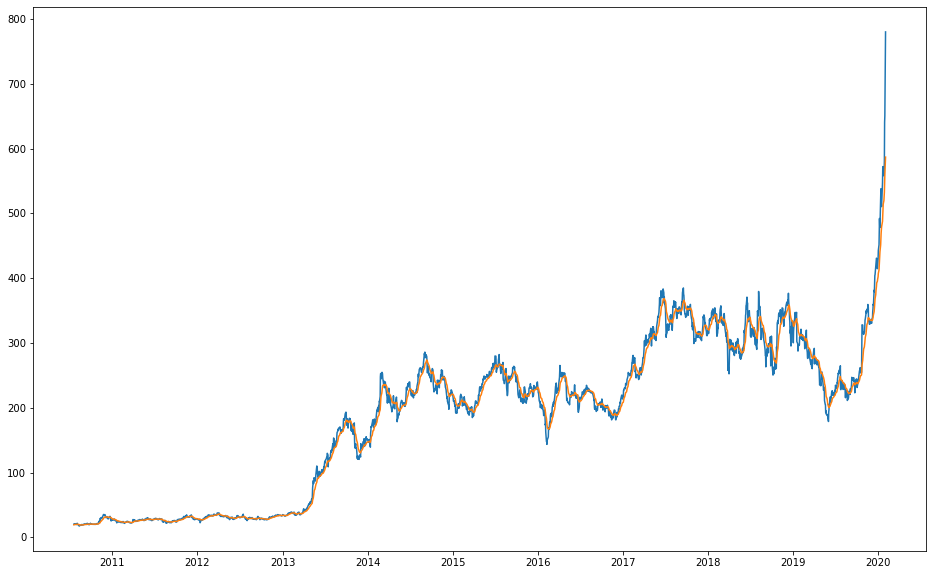

In [11]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['EMA_15'])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_15']], test_size=.2)

In [13]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Intercept: [3.00521878]
Model Coefficients: [[0.97572969]]
Mean Absolute Error: 7.68942476606769
Coefficient of Determination: 0.9871153938282788


In [15]:
df2 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted' : y_pred.flatten()})


In [16]:
df2.head(10)

,Actual,Predicted
0,24.436220,25.554333
1,272.363983,256.294884
2,293.082721,280.639353
3,227.187804,244.000699
4,245.341836,248.450024
5,206.363821,211.723560
6,239.406738,241.805307
7,197.012100,193.906726
8,220.143347,222.105323
9,238.033728,237.375487


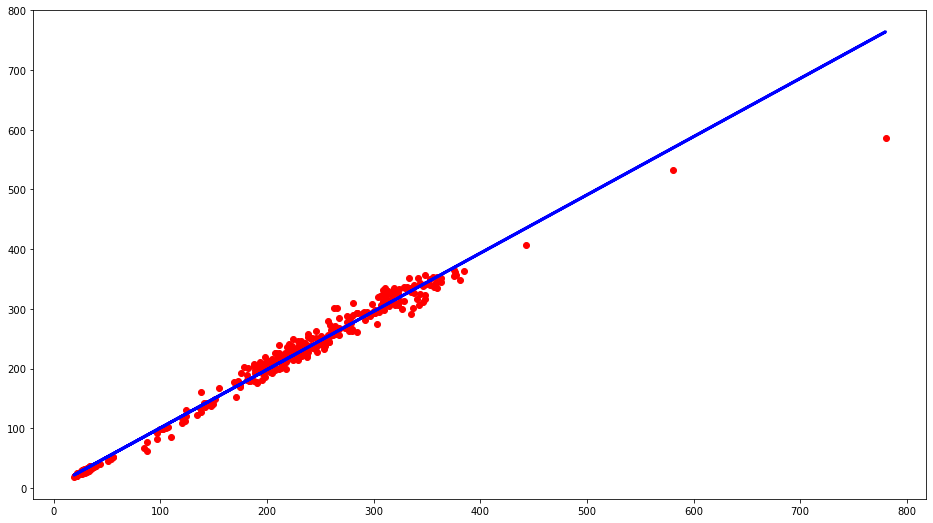

In [17]:
plt.figure(figsize=(16,9))
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test,y_pred, color="blue", linewidth=3)
plt.show()

In [19]:
model.coef_

array([[0.97572969]])

In [20]:
model.intercept_


array([3.00521878])